In [1]:
# Домашнее задание 3
# Этап 1 - Создание соединения с базой данных

# Откройте Anaconda Prompt и выполните следующую команду
# (для Windows)
# pip install psycopg2
# (для MacOS)
# pip install psycopg2-binary

# Создаем соединение c базой данных (ВНИМАНИЕ! Ваши данные для подключения с БД могут отличаться)

# Импортируем драйвер для postgresql
import psycopg2

# Прячем пароль, чтобы все было безопасно
import getpass

# Задаем переменную для установления соединения с базой данных
conn = psycopg2.connect(user='postgres',database='postgres',host='localhost',port='5432',password=getpass.getpass('Введите пароль: '))

Введите пароль: ········


In [16]:
# Этап 2 - Построение таблицы распределения заемщиков на дефолтеров и недефолтеров

# Импортируем pandas для работы с таблицами
import pandas as pd
# Вводим тип рейтинга
rat_id = int(input('Введите тип рейтинга (для агенства Эксперт РА это число от 12 до 29): '))
# Создаем список, в котором будет содержаться рассматриваемый период
period = []
# Вводим дату начала периода
date1 = input('Введите дату начала периода в формате ГГГГ-ММ-ДД: ')
# Добавляем начало периода в список
period.append(date1)
# Вводим дату окончания периода
date2 = input('Введите дату окончания периода в формате ГГГГ-ММ-ДД: ')
# Добавляем окончание периода в список
period.append(date2)
# Создаем в базе данных таблицу, в которой содержатся все присвоения рейтингов агентством Эксперт РА, где присутствуют
# дефолты из таблицы events
lllll = """DROP TABLE if exists public.dz2; CREATE TABLE public.dz2 (grade text, change text, date date, ent_name text,
rat_id smallint) TABLESPACE pg_default; ALTER TABLE public.dz2 OWNER to postgres; INSERT INTO dz2 SELECT query1.grade,
change, date, ent_name, query1.rat_id FROM (SELECT grade, change, date, ent_name, actions.rat_id FROM actions 
JOIN rat_info ON actions.rat_id = rat_info.rat_id WHERE agency_id = 'EXP') as query1 JOIN scale_exp 
ON query1.grade = scale_exp.grade; INSERT INTO dz2 
(grade, date, ent_name) SELECT grade, date, ent_name FROM events WHERE grade = 'D'; SELECT * FROM dz2;"""
# Передаем запрос в базу данных и записываем результат в переменную
lllll = pd.read_sql_query(lllll, conn)
# Выводим таблицу, содержащую актуальные рейтинги на date1
kkkkk = """select ent_name, grade from public.dz2 inner join (select max(date) as assign_date, ent_name as ent2_name
from public.dz2 where rat_id = """ + str(rat_id) + """ AND date <= '""" + period[0] + """' group by ent_name) as zapros1
on public.dz2.date = zapros1.assign_date and public.dz2.ent_name = zapros1.ent2_name where change <> 'снят' 
and change <> 'приостановлен' and rat_id = """ + str(rat_id) + """;"""
# Передаем запрос в базу данных и записываем результат в переменную
kkkkk = pd.read_sql_query(kkkkk, conn)
# Выводим таблицу, содержащую актуальные рейтинги на date2
qqqqq = """select ent_name, grade from public.dz2 inner join (select max(date) as assign_date, ent_name as ent2_name
from public.dz2 where rat_id = """ + str(rat_id) + """ AND date <= '""" + period[1] + """' group by ent_name) as zapros1
on public.dz2.date = zapros1.assign_date and public.dz2.ent_name = zapros1.ent2_name where change <> 'снят' 
and change <> 'приостановлен' and rat_id = """ + str(rat_id) + """;"""
# Передаем запрос в базу данных и записываем результат в переменную
qqqqq = pd.read_sql_query(qqqqq, conn)
# Производим слияние таблиц таким образом, чтобы в итоговой таблице содержались только данные о тех компаниях, которые
# имели актуальный недефолтный рейтинг на date1 и любой рейтинг на date2, кроме 'снят' и 'приостановлен'
aaaaa = kkkkk.merge(qqqqq, left_on = 'ent_name', right_on = 'ent_name')
aaaaa = aaaaa[(aaaaa['grade_x'] != 'D')&(aaaaa['grade_x'] != 'E')]
# Достаем столбец рейтингов из таблицы scale_exp
ppppp = "select grade from public.scale_exp"
# Передаем запрос в базу данных и записываем результат в переменную
ppppp = pd.read_sql_query(ppppp, conn)
# Отсеиваем дефолтные рейтинги, снят и приостановлен
ppppp = ppppp[0:9]
# Создаем словарь, списко и переменные, которые будем использовать в цикле
k = {}
list1 = []
default = 0
non_default = 0
# Создаем цикл, который перебирает значения рейтингов
for i in range (0, ppppp.shape[0]):
#     Извлекаем значения рейтингов из столбца
    ooooo = ppppp.iloc[i]['grade']
#     Создаем цикл, который просматривает все строчки в созданной таблице
    for j in range (0, aaaaa.shape[0]):
#         Передаем в переменную значение из столбца с актуальным на date1 рейтингом
        rrrrr = aaaaa.iloc[j]['grade_x']
#         Передаем в переменную значение из столбца с актуальным на date2 рейтингом
        wwwww = aaaaa.iloc[j]['grade_y']
#         Создаем условие, отбирающее дефолтные и недефолтные строчки
        if rrrrr == ooooo and (wwwww == 'D' or wwwww == 'E'):
            default = default + 1
        elif rrrrr == ooooo and (wwwww == 'A++' or wwwww == 'A+' or wwwww == 'A' or wwwww == 'B++' or wwwww == 'B+' or wwwww == 'B' or wwwww == 'C++' or wwwww == 'C+' or wwwww == 'C'):
            non_default = non_default + 1
#     Передаем в список количество дефолтных компаний для данной рейтинговой категории        
    list1.append(default)
#     Передаем в список количество недефолтных компаний для данной рейтинговой категории 
    list1.append(non_default)
#     Добавляем список в словарь
    k[ooooo] = list1
#     Обнуляем переменные и список для дальнейшей корректной работы
    default = 0
    non_default = 0
    list1 = []
# Создаем таблицу из полученного словаря
wau = pd.DataFrame(k)
# Транспонируем таблицу
wau = wau.T
# Создаем названия столбцов
clms = ('default', 'non-default')
# Переименовываем столбцы
wau.columns = clms
# Переименовываем индекс
wau.index.names = ['rating']
# Выводим итоговую таблицу распределения
wau

Введите тип рейтинга (для агенства Эксперт РА это число от 12 до 29): 14
Введите дату начала периода в формате ГГГГ-ММ-ДД: 2012-12-12
Введите дату окончания периода в формате ГГГГ-ММ-ДД: 2018-12-12


,default,non-default
rating,,
A++,0,2
A+,1,13
A,0,50
B++,0,18
B+,0,0
B,0,0
C++,0,0
C+,0,0
C,0,0


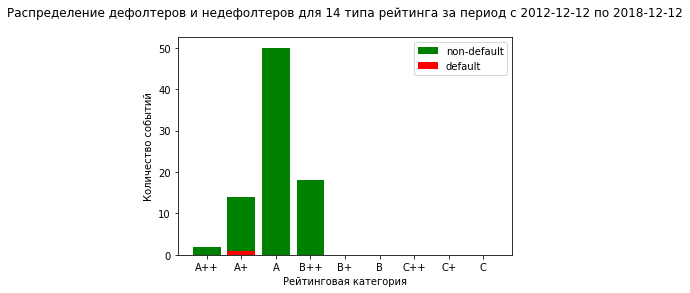

,default,non-default,sum
rating,,,
A++,0,2,2
A+,1,13,14
A,0,50,50
B++,0,18,18
B+,0,0,0
B,0,0,0
C++,0,0,0
C+,0,0,0
C,0,0,0


In [17]:
# Этап 3 - Визуализация распределения с помощью графика

# Импортируем matplotlib для работы с графиками
import matplotlib.pyplot as plt
# Создаем новую таблицу, чтобы не изменять старую (+ проделываем с ней то же самое, что и со старой)
tre = pd.DataFrame(k)
tre = tre.T
tre.columns = clms
tre.index.names = ['rating']
# Создаем новый столбец, содержащий сумму двух других
tre['sum'] = tre['default'] + tre['non-default']
# Строим столбчатую диаграмму, создаем для нее легенду, подписываем оси, даем ей название и выводим на экран
plt.bar(tre.index, tre['sum'],color = 'g')
plt.bar(tre.index, tre['default'],color = 'r')
plt.legend(['non-default','default'])
plt.xlabel('Рейтинговая категория')
plt.ylabel('Количество событий')
plt.title('Распределение дефолтеров и недефолтеров для ' + str(rat_id) + ' типа рейтинга за период с ' + period[0] + ' по ' + period[1] + '\n')
plt.show()
tre

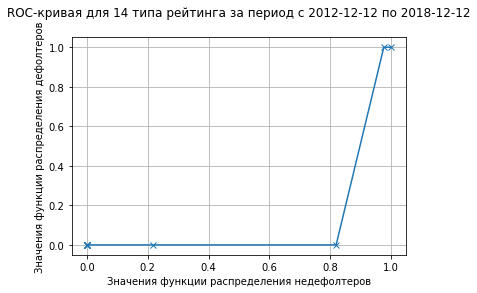

In [18]:
# Этап 4 - Нахождение эмпирических функций распределения и построение ROC-кривой

# Суммируем количество недефолтеров
sum_ndef = tre['non-default'].sum()
# Суммируем количество дефолтеров
sum_def = tre['default'].sum()
# Делаем индекс таблицы численным
tre.index = range(tre.shape[0])
# Создаем переменные и списки для работы с циклом
qw = 0
wq = 0
ljk = []
lkj = []
# Создаем цикл для нахождения функций распределения
for z in range (8, -1, -1):
#     Записываем в переменную значение накопленной суммы для данной итерации
    qw = tre.iloc[z]['default'] + qw
    wq = tre.iloc[z]['non-default'] + wq
#     Вычисляем значения функции распределения
    if sum_def != 0:
        jk = qw/sum_def
    else:
        jk = 0
    if sum_ndef != 0:
        kj = wq/sum_ndef
    else:
        kj = 0
#     Записываем в список полученные значения
    ljk.append(jk)
    lkj.append(kj)
# Строим ROC-кривую, подписываем оси и даем название графику    
plt.plot(lkj, ljk, marker = 'x')
plt.xlabel('Значения функции распределения недефолтеров')
plt.ylabel('Значения функции распределения дефолтеров')
plt.title('ROC-кривая для ' + str(rat_id) + ' типа рейтинга за период с ' + period[0] + ' по ' + period[1] + '\n')
plt.grid()
plt.show()